In [25]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

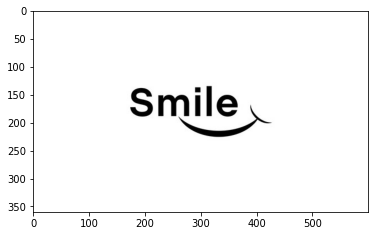

In [26]:
img = cv2.imread('smile.jpg')
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

In [27]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

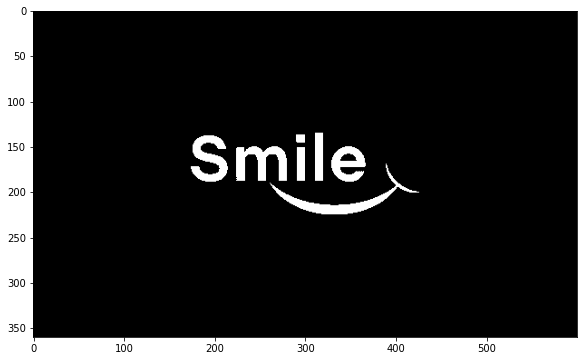

In [28]:
ret, binary_img = cv2.threshold(gray_img, 127, 255, type=cv2.THRESH_BINARY_INV)
plt.figure(figsize=(14, 6))
plt.imshow(binary_img, cmap='gray')
plt.show()

In [6]:
kernel = np.ones((3, 3), dtype=np.uint8) * 255
kernel

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [7]:
set(list(binary_img.flatten()))

{0, 255}

In [8]:
binary_img.min()

0

In [9]:
def get_dialation(img, kernel, iterations=1):
    def dilate(src, kernel):
        dst = np.zeros(src.shape, dtype=np.uint8)
        for i in range(src.shape[0]):
            for j in range(src.shape[1]):
                if src[i, j] == 255:
                    dst[i-1:i+2, j-1:j+2] = kernel
        return dst
    for i in range(iterations):
        img = dilate(img, kernel)
    
    return img

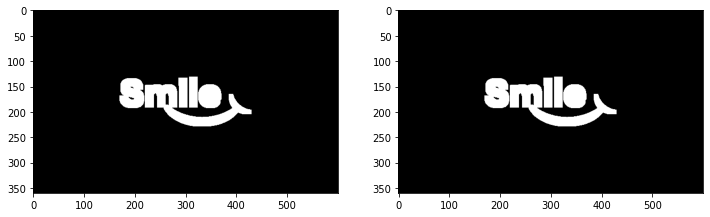

In [10]:
iterations=4
dilation_img = cv2.dilate(binary_img, kernel=kernel, iterations=iterations)
dilation_img2 = get_dialation(binary_img, kernel=kernel, iterations=iterations)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(dilation_img, cmap='gray')
ax[1].imshow(dilation_img2, cmap='gray')

In [21]:
import copy

In [29]:
def dilate_morph(img, kernel, iterations):
        
    def dilate_with_numpy(input_img, kernel):
        img = copy.deepcopy(input_img)
        src = np.pad(img, kernel.shape[0]-2)
        
        for i in range(src.shape[0]-2):
            for j in range(src.shape[1]-2):
                if (src[i:i+kernel.shape[0], j:j+kernel.shape[1]] == kernel).any():
                    img[i,j] = 255

        
        return img

    for i in range(iterations):
        img = dilate_with_numpy(img, kernel)

    return img



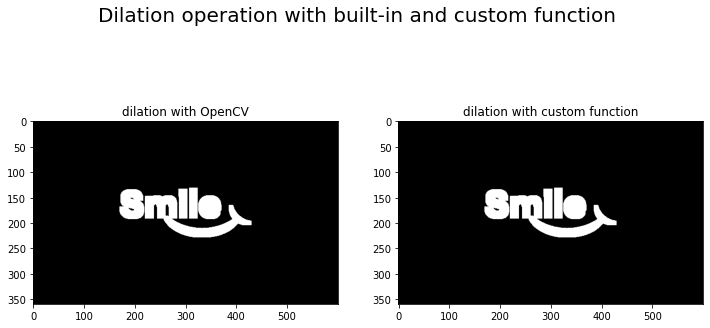

In [32]:
iterations=4
dilation_img = cv2.dilate(binary_img, kernel=kernel, iterations=iterations)
dilation_img2 = dilate_morph(img=binary_img, kernel=kernel, iterations=iterations)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(dilation_img, cmap='gray')
ax[0].set_title('dilation with OpenCV')
ax[1].imshow(dilation_img2, cmap='gray')
ax[1].set_title('dilation with custom function')
plt.suptitle('Dilation operation with built-in and custom function', fontsize=20)
plt.show()

In [71]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[0, 2, 0], [0, 0, 0], [0, 0, 0]])



In [85]:
print((a[:, 1:] == b[:, 1:]))

[[ True False]
 [False False]
 [False False]]
